<a href="https://colab.research.google.com/github/Tanmoy-94/Structural-Dynamics-/blob/main/LCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Inventory Data:
     Process  Electricity (kWh)   Steel (kg)    CO2 (kg)   NOx (kg)
0  Process_1         405.813113  1644.345751   20.086402   9.578523
1  Process_2         953.178591   675.027760  485.255828  15.559991
2  Process_3         745.394245  8675.143843  417.896894  26.475443
3  Process_4         618.725560  6051.038616  114.046164  21.881278
4  Process_5         198.217708  7109.918520   99.094234  14.915842

Characterization Factors:
                        Impact Category  Electricity (kWh)  Steel (kg)  \
0  Global Warming Potential (kg CO2 eq)               0.50        1.20   
1   Acidification Potential (kg SO2 eq)               0.01        0.05   

   CO2 (kg)  NOx (kg)  
0         1       0.0  
1         0       1.2  

Impact Assessment Results (Sample):
   Global Warming Potential (kg CO2 eq)  Acidification Potential (kg SO2 eq)  \
0                           2196.207860                            97.769647   
1                           1771.878436           

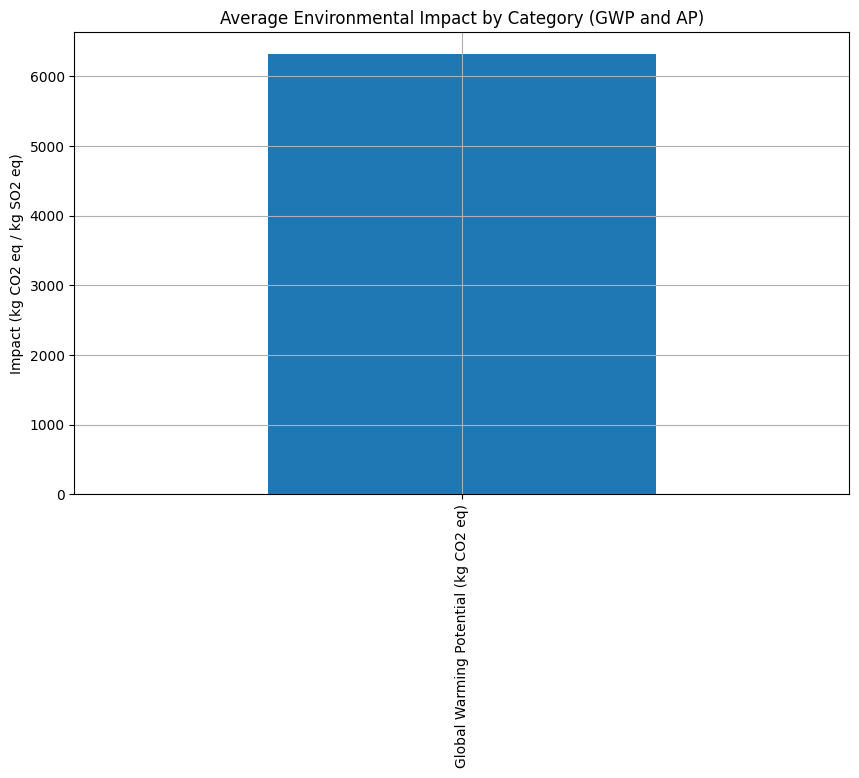

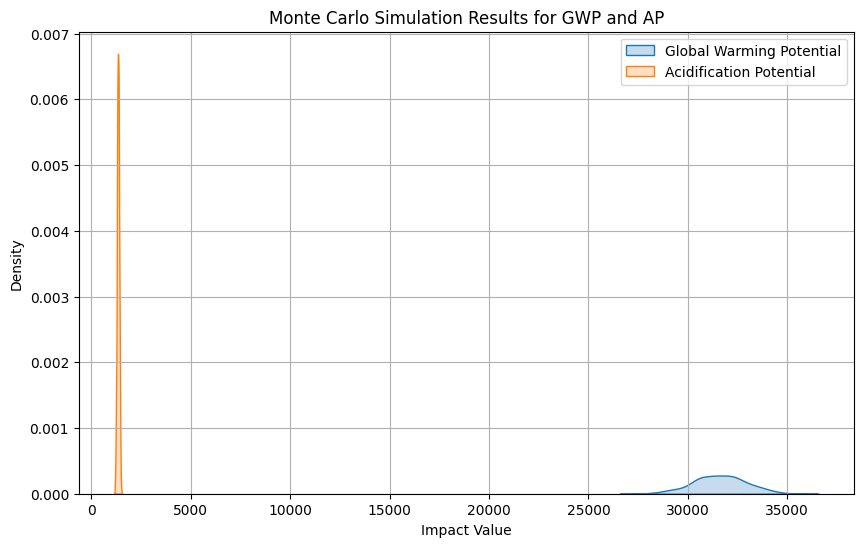

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Digraph

# Set random seed for reproducibility
np.random.seed(42)

# Simulate large-scale inventory data for multiple processes
num_processes = 5  # Assume we have 5 processes for simplicity in visualization
inventory_data = {
    'Process': [f'Process_{i}' for i in range(1, num_processes + 1)],
    'Electricity (kWh)': np.random.uniform(50, 1000, num_processes),  # Electricity usage in kWh
    'Steel (kg)': np.random.uniform(100, 10000, num_processes),  # Steel consumption in kg
    'CO2 (kg)': np.random.uniform(10, 500, num_processes),  # CO2 emissions in kg
    'NOx (kg)': np.random.uniform(0.5, 50, num_processes)  # NOx emissions in kg
}

inventory_df = pd.DataFrame(inventory_data)
print("Sample Inventory Data:")
print(inventory_df.head())

# Characterization factors for Global Warming Potential (GWP) and Acidification Potential (AP)
cf_data = {
    'Impact Category': ['Global Warming Potential (kg CO2 eq)', 'Acidification Potential (kg SO2 eq)'],
    'Electricity (kWh)': [0.5, 0.01],  # GWP and AP per kWh of electricity
    'Steel (kg)': [1.2, 0.05],  # GWP and AP per kg of steel
    'CO2 (kg)': [1, 0],  # GWP for CO2, 0 for AP
    'NOx (kg)': [0, 1.2]  # AP for NOx, 0 for GWP
}

cf_df = pd.DataFrame(cf_data)
print("\nCharacterization Factors:")
print(cf_df)

# Function to calculate impacts using characterization factors
def calculate_impacts(inventory, cf):
    impacts = pd.DataFrame()
    for category in cf['Impact Category']:
        impacts[category] = (
            inventory['Electricity (kWh)'] * cf.loc[cf['Impact Category'] == category, 'Electricity (kWh)'].values[0] +
            inventory['Steel (kg)'] * cf.loc[cf['Impact Category'] == category, 'Steel (kg)'].values[0] +
            inventory['CO2 (kg)'] * cf.loc[cf['Impact Category'] == category, 'CO2 (kg)'].values[0] +
            inventory['NOx (kg)'] * cf.loc[cf['Impact Category'] == category, 'NOx (kg)'].values[0]
        )
    return impacts

# Calculate impacts for the inventory data
impact_df = calculate_impacts(inventory_df, cf_df)

# Add Process column back to impact dataframe for visualization
impact_df['Process'] = inventory_df['Process']
print("\nImpact Assessment Results (Sample):")
print(impact_df.head())

# Visualization of the system flowchart using graphviz
def draw_system_flowchart(inventory_df, impact_df):
    dot = Digraph(comment='LCA System Flow', format='png')

    # Create a boundary (system boundary)
    dot.attr(label="System Boundary", labelloc="t", fontsize="16", color="black")
    dot.attr(rankdir='LR', size='10,5')  # Left to right graph

    # Define the processes as nodes
    for i, row in inventory_df.iterrows():
        process_name = row['Process']
        dot.node(process_name, f'{process_name}\n(Electricity: {row["Electricity (kWh)"]:.1f} kWh\nSteel: {row["Steel (kg)"]:.1f} kg)', shape='box', style='filled', fillcolor='lightblue')

    # Define inputs (Electricity, Steel, Emissions) outside the boundary
    dot.node('Electricity', 'Electricity (kWh)', shape='ellipse', style='filled', fillcolor='yellow')
    dot.node('Steel', 'Steel (kg)', shape='ellipse', style='filled', fillcolor='yellow')
    dot.node('CO2', 'CO2 Emissions (kg)', shape='ellipse', style='filled', fillcolor='yellow')
    dot.node('NOx', 'NOx Emissions (kg)', shape='ellipse', style='filled', fillcolor='yellow')

    # Define outputs (Impacts) outside the boundary
    dot.node('GWP', 'Global Warming Potential (kg CO2 eq)', shape='ellipse', style='filled', fillcolor='green')
    dot.node('AP', 'Acidification Potential (kg SO2 eq)', shape='ellipse', style='filled', fillcolor='green')

    # Connect the inputs to the processes
    for i, row in inventory_df.iterrows():
        process_name = row['Process']
        dot.edge('Electricity', process_name)
        dot.edge('Steel', process_name)
        dot.edge('CO2', process_name)
        dot.edge('NOx', process_name)

    # Connect the processes to outputs (impacts)
    for i, row in impact_df.iterrows():
        process_name = row['Process']
        dot.edge(process_name, 'GWP', label=f'{row["Global Warming Potential (kg CO2 eq)"]:.1f}')
        dot.edge(process_name, 'AP', label=f'{row["Acidification Potential (kg SO2 eq)"]:.1f}')

    return dot

# Generate the flowchart
system_flowchart = draw_system_flowchart(inventory_df, impact_df)
system_flowchart.render('lca_system_flowchart', view=True)  # Saves and opens the flowchart

# Monte Carlo Simulation for Uncertainty Analysis
num_simulations = 1000
monte_carlo_results = []

for _ in range(num_simulations):
    # Simulate uncertainty in inventory data (assuming normal distribution)
    electricity_sim = np.random.normal(inventory_df['Electricity (kWh)'], 50)
    steel_sim = np.random.normal(inventory_df['Steel (kg)'], 500)
    co2_sim = np.random.normal(inventory_df['CO2 (kg)'], 10)
    nox_sim = np.random.normal(inventory_df['NOx (kg)'], 1)

    # Recreate inventory dataframe with simulated values
    simulated_inventory = pd.DataFrame({
        'Electricity (kWh)': electricity_sim,
        'Steel (kg)': steel_sim,
        'CO2 (kg)': co2_sim,
        'NOx (kg)': nox_sim
    })

    # Calculate impacts for simulated data
    simulated_impacts = calculate_impacts(simulated_inventory, cf_df)
    monte_carlo_results.append(simulated_impacts.sum())

# Convert results to DataFrame
mc_df = pd.DataFrame(monte_carlo_results)

# Visualization: Bar Chart for Average Impacts
mean_impacts = impact_df.drop(columns=['Process']).mean() # Drop the 'Process' column before calculating the mean
plt.figure(figsize=(10, 6))
mean_impacts[:-1].plot(kind='bar')
plt.title('Average Environmental Impact by Category (GWP and AP)')
plt.ylabel('Impact (kg CO2 eq / kg SO2 eq)')
plt.grid(True)
plt.show()

# Visualization: Monte Carlo Simulation Results with Uncertainty
plt.figure(figsize=(10, 6))
sns.kdeplot(mc_df['Global Warming Potential (kg CO2 eq)'], label='Global Warming Potential', fill=True)
sns.kdeplot(mc_df['Acidification Potential (kg SO2 eq)'], label='Acidification Potential', fill=True)
plt.title('Monte Carlo Simulation Results for GWP and AP')
plt.xlabel('Impact Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
from graphviz import Digraph

# Function to draw system flowchart
def draw_system_flowchart(inventory_df, impact_df):
    dot = Digraph(comment='LCA System Flow', format='png')

    # Create a boundary (system boundary)
    dot.attr(label="System Boundary", labelloc="t", fontsize="16", color="black")
    dot.attr(rankdir='LR', size='10,5')  # Left to right graph

    # Define the processes as nodes
    for i, row in inventory_df.iterrows():
        process_name = row['Process']
        dot.node(process_name, f'{process_name}\n(Electricity: {row["Electricity (kWh)"]:.1f} kWh\nSteel: {row["Steel (kg)"]:.1f} kg)', shape='box', style='filled', fillcolor='lightblue')

    # Define inputs (Electricity, Steel, Emissions) outside the boundary
    dot.node('Electricity', 'Electricity (kWh)', shape='ellipse', style='filled', fillcolor='yellow')
    dot.node('Steel', 'Steel (kg)', shape='ellipse', style='filled', fillcolor='yellow')
    dot.node('CO2', 'CO2 Emissions (kg)', shape='ellipse', style='filled', fillcolor='yellow')
    dot.node('NOx', 'NOx Emissions (kg)', shape='ellipse', style='filled', fillcolor='yellow')

    # Define outputs (Impacts) outside the boundary
    dot.node('GWP', 'Global Warming Potential (kg CO2 eq)', shape='ellipse', style='filled', fillcolor='green')
    dot.node('AP', 'Acidification Potential (kg SO2 eq)', shape='ellipse', style='filled', fillcolor='green')

    # Connect the inputs to the processes
    for i, row in inventory_df.iterrows():
        process_name = row['Process']
        dot.edge('Electricity', process_name)
        dot.edge('Steel', process_name)
        dot.edge('CO2', process_name)
        dot.edge('NOx', process_name)

    # Connect the processes to outputs (impacts)
    for i, row in impact_df.iterrows():
        process_name = row['Process']
        dot.edge(process_name, 'GWP', label=f'{row["Global Warming Potential (kg CO2 eq)"]:.1f}')
        dot.edge(process_name, 'AP', label=f'{row["Acidification Potential (kg SO2 eq)"]:.1f}')

    return dot

# Example Inventory Data
inventory_data = {
    'Process': ['Process_1', 'Process_2'],
    'Electricity (kWh)': [200, 500],
    'Steel (kg)': [1500, 3000],
    'CO2 (kg)': [100, 300],
    'NOx (kg)': [20, 40]
}

# Example Impact Data
impact_data = {
    'Process': ['Process_1', 'Process_2'],
    'Global Warming Potential (kg CO2 eq)': [350, 900],
    'Acidification Potential (kg SO2 eq)': [25, 60]
}

# Convert to DataFrame
import pandas as pd
inventory_df = pd.DataFrame(inventory_data)
impact_df = pd.DataFrame(impact_data)

# Generate the flowchart
system_flowchart = draw_system_flowchart(inventory_df, impact_df)
system_flowchart.render('lca_system_flowchart', view=True)  # Saves and opens the flowchart


'lca_system_flowchart.png'

In [13]:
!ls

lca_system_flowchart  lca_system_flowchart.png	sample_data


In [14]:
!ls

lca_system_flowchart  lca_system_flowchart.png	sample_data


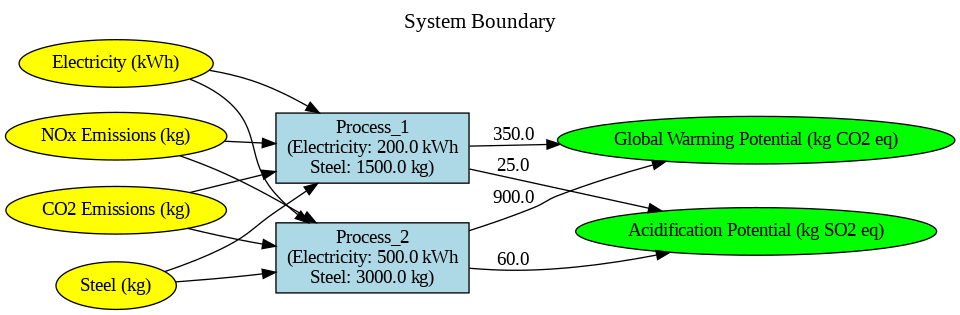

In [16]:
from IPython.display import Image

fname = "lca_system_flowchart.png"
Image(fname)